In this Notebook.We will use One Hot Encodinng and Simple Imputer


In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

In [80]:
df=pd.read_csv('titanic.csv')

In [81]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [82]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [84]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [85]:
df.duplicated().sum()

0

In [86]:
df.Age.isnull().sum()

177

<Axes: xlabel='Age', ylabel='Density'>

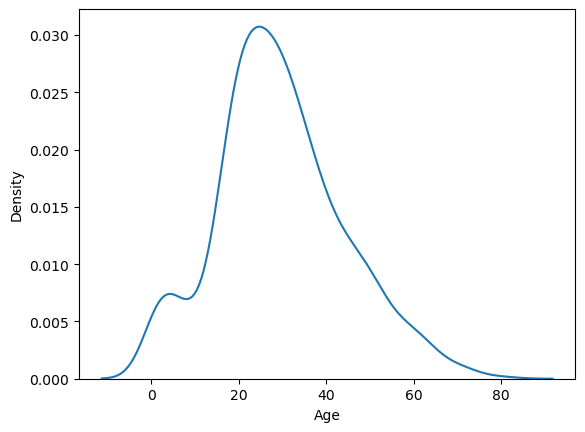

In [87]:
sns.kdeplot(df.Age)

In [88]:
df1=df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [89]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [90]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [91]:
x_train,x_test,y_train,y_test=train_test_split(df1.drop(['Survived'],axis=1),df1.Survived,test_size=0.2,random_state=42)

In [92]:
si=SimpleImputer(strategy='mean')

In [93]:
si.fit(x_train[['Age']])

SimpleImputer()

In [94]:
train_age_transform=si.transform(x_train[['Age']])
test_age_transform=si.transform(x_test[['Age']])

In [100]:
ohe=OneHotEncoder(sparse_output=False,drop='first')
ohe1=OneHotEncoder(sparse_output=False,drop='first')

In [101]:
sex_train_transform=ohe.fit_transform(x_train[['Sex']])
embarked_train_transform=ohe1.fit_transform(x_train[['Embarked']])


In [102]:
sex_test_transform=ohe.transform(x_test[['Sex']])
embarked_test_transform=ohe1.transform(x_test[['Embarked']])

In [104]:
x_train_rem=x_train.drop(['Age','Sex','Embarked'],axis=1)
x_test_rem=x_test.drop(['Age','Sex','Embarked'],axis=1)

In [105]:
x_train_new=np.concatenate((train_age_transform,sex_train_transform,embarked_train_transform,x_train_rem),axis=1)
x_test_new=np.concatenate((test_age_transform,sex_test_transform,embarked_test_transform,x_test_rem),axis=1)

In [109]:
x_train_new.shape

(712, 9)

In [110]:
x_test_new.shape

(179, 9)

In [111]:
from sklearn.tree import DecisionTreeClassifier


In [112]:
clf=DecisionTreeClassifier()

In [113]:
clf.fit(x_train_new,y_train)

DecisionTreeClassifier()

In [114]:
y_pred=clf.predict(x_test_new)

In [115]:
from sklearn.metrics import accuracy_score

In [116]:
accuracy_score(y_test,y_pred)

0.7877094972067039

In [120]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf,x_train_new,y_train,cv=5,scoring='accuracy').mean()

0.7415936176499557